# Imports

In [5]:

from pycbc import distributions
from pycbc.waveform import get_td_waveform
import matplotlib.pyplot as plt
import numpy as np
import pylab
from tqdm.notebook import tqdm
from gwpy.timeseries import TimeSeries
import pandas as pd
import os
import csv
from gwosc.datasets import event_gps
from gwpy.timeseries import TimeSeries
from pycbc.catalog import Merger
import pylab
from pycbc.filter import resample_to_delta_t, highpass
import pycbc.psd
import pycbc.noise

/Users/adamvanzant/.pyenv/versions/gw_env_39/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal


# Marginal Events Data Download

In [6]:
marginal_events =  ["170720",
                    "170705",
                    "170630",
                    "170616",
                    "170423",
                    "170412",
                    "170405",
                    "170219",
                    "170208",
                    "161217",
                    "161202",
                    "151116",
                    "151012.2",
                    "151008",
                    "GW190531_023648",
                    "GW190426_152155",
                    "GW200311_103121",
                    "200219_201407",
                    "GW200201_203549",
                    "200121_031748",
                    "GW200105_162426",
                    "GW191118_212859",
                    "200214_224526",
                    "200114_020818",
                    "191225_215715",
                    "191223_014159",
                    "190924_232654"]

In [ ]:
directory = "Downloads/Gravitational-Wave-Detection-Using-Deep-Learning/LIGO-Detector-Data/Marginal-events/"

In [8]:
print(len(marginal_events))

27


In [9]:
# Code to fetch strain data from GWOSC server

for i in tqdm(range(len(marginal_events))):

    gps = event_gps(marginal_events[i])
    start = int(gps) - 15
    end = int(gps) + 15

    if i == 19:
        data = TimeSeries.fetch_open_data('H1', start, end)

    else:
        data = TimeSeries.fetch_open_data('L1', start, end)

    data.write(directory + "Original-signals/"+marginal_events[i]+".txt")       
    

  0%|          | 0/27 [00:00<?, ?it/s]

In [10]:
# Merging Original Strain Data Templates into single file

path = directory + "Original-signals/"
files= os.listdir(path)
f = open(directory + 'Original_signals.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/27 [00:00<?, ?it/s]

In [11]:
# Processed strain data

for i in tqdm(range(len(marginal_events))):
    gps = event_gps(marginal_events[i])
    
    data = TimeSeries.read(directory + "Original-signals/"+marginal_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data.write(directory + "Processed-signals/"+marginal_events[i]+".txt")    
    

  0%|          | 0/27 [00:00<?, ?it/s]

In [12]:
# Merging Processed Strain Data Templates into single file

path = directory + "Processed-signals/"
files= os.listdir(path)
f = open(directory + 'Processed_Marginal_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/27 [00:00<?, ?it/s]

In [13]:
# Another way of processing the strain data
# Scaled Processed strain data

for i in tqdm(range(len(marginal_events))):
    gps = event_gps(marginal_events[i])
    
    data = TimeSeries.read(directory + "Original-signals/"+marginal_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.whiten(4, 4)
    data = data.highpass_fir(30, 512).lowpass_fir(250, 512)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data = (data/(max(data.max(), np.abs(data.min()))))*1.25
    data *= 0.4
    data *= 1e-17

    data.write(directory + "Scaled-Processed-signals/"+marginal_events[i]+".txt")    
    

  0%|          | 0/27 [00:00<?, ?it/s]

In [14]:
# Merging Scaled Processed Strain Data Templates into single file

path = directory + "Scaled-Processed-signals/"
files= os.listdir(path)
f = open(directory + 'Scaled_Processed_Marginal_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/27 [00:00<?, ?it/s]

In [15]:
# Another way of processing the strain data
## Scaled Sliced strain data

for i in tqdm(range(len(marginal_events))):
    gps = event_gps(marginal_events[i])
    
    data = TimeSeries.read(directory + "Original-signals/"+marginal_events[i]+".txt")    
    data = TimeSeries.to_pycbc(data)
    data = data.time_slice(gps - 2, gps + 2)
    
    data = TimeSeries.from_pycbc(data)
    data = (data/(max(data.max(), np.abs(data.min()))))*1.25
    data *= 0.4
    data *= 1e-17

    data.write(directory + "Scaled-Sliced-signals/"+marginal_events[i]+".txt")    
    

  0%|          | 0/27 [00:00<?, ?it/s]

In [16]:
# Merging Scaled Sliced Strain Data Templates into single file

path = directory + "Scaled-Sliced-signals/"
files= os.listdir(path)
f = open(directory + 'Scaled_Sliced_Marginal_Merged.csv', 'w')
cw = csv.writer(f)

for i in tqdm(files):
    df = pd.read_csv(path+i,sep = ' ', header=None)
    c = df[:][1]
    cw.writerow(c)
f.close()

  0%|          | 0/27 [00:00<?, ?it/s]

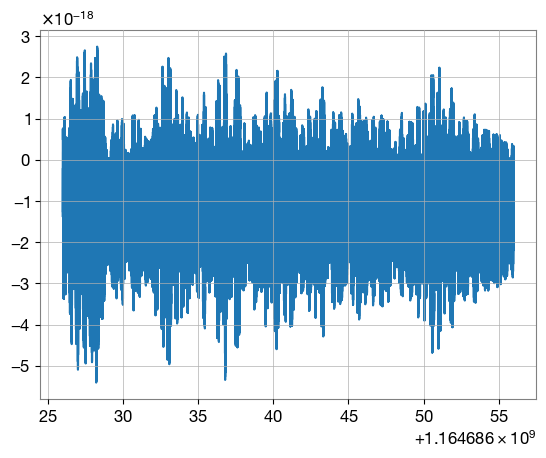

In [17]:
# Visualization of the Processed Strain Data
# Duration of the data is 4s, i.e. a 2s interval around the merger

i = 10
data = TimeSeries.read(directory + "Original-signals/"+marginal_events[i]+".txt")
plt.plot(data)